# `jsonb`

Tässä harjoituksessa opetellaan käsittelemään `jsonb`-tietotyyppiä.
Harjoitusmateriaalina toimii skeema `hfp`.

Skeeman ainoaan tauluun `vehicle_events` on tallennettu hetken ajan Helsingin Seudun Liikenteen (HSL) ajoneuvojen avointa statusviestivirtaa.
Kukin ajoneuvo lähettää sijaintinsa kerran sekunnissa ja lisäksi muita viestejä erinäisten tapahtumien yhteydessä.
Kyseisen MQTT-rajapinnan nimi on [High-frequency positioning (HFP)](https://digitransit.fi/en/developers/apis/4-realtime-api/vehicle-positions/), ja sen dokumentaatio löytyy [täältä](https://digitransit.fi/en/developers/apis/4-realtime-api/vehicle-positions/).

## Valmistelu

Avaa tämän notebookin rinnalle uusi terminaali Jupyterin aloitusnäkymän pudotusvalikosta "New > Terminal". Käynnistä `psql`. Aja:
```sql
SET search_path = hfp;
\d+ vehicle_events
```

Saat vastaavan informaation kuin seuraavassa kuvassa:
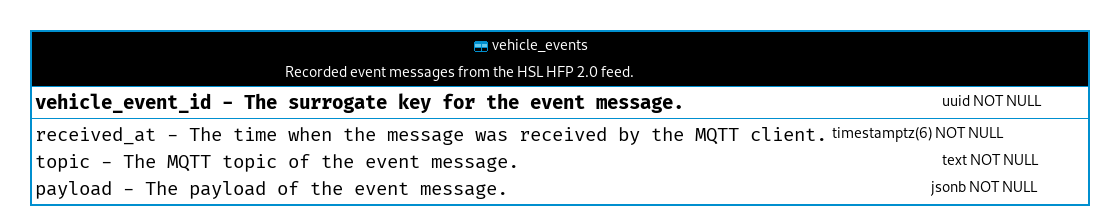

Tutustu sarakkeiden tietoihin.

Aja lisäksi seuraava solu tehtävien avuksi.

In [ ]:
SET search_path = hfp;

Tarkastele vielä joitakin rivejä ja erityisesti `payload`-saraketta saadaksesi tuntumaa aineistoon:

In [ ]:
SELECT *
FROM vehicle_events
LIMIT 3;

## Tehtävä 1

Selvitä `payload`-sarakkeen kautta, miten aineisto jakaantuu eri tapahtumatyyppeihin, kuten `VP`.
Tee kysely, jonka tuloksena saat sarakkeet `event_type` ja `count`.
Järjestä rivit laskevasti `count`-sarakkeen ja nousevasti `event_type`-sarakkeen mukaan.

Sopiva funktio löytyy [täältä](https://www.postgresql.org/docs/12/functions-json.html#FUNCTIONS-JSON-PROCESSING-TABLE).

## Tehtävä 2

Etsi kronologisesti (`received_at`) kolme ensimmäistä `VP`-viestiä, joissa ajoneuvoa ajava operaattori (`oper`) on 36 ja ajoneuvon kylkinumero (`veh`) on 14.
Palauta kaikki sarakkeet.

Kokeile ensin mitä vain toimivaa tapaa.

Etsi sitten ratkaisu, jossa käytetään vain yhtä `jsonb`-operaattoria vain kerran.

## Tehtävä 3

Laske seuraavaksi vauhdin (`spd`) aritmeettinen keskiarvo (`avg()`) kaikista `ARR`-viesteistä.
(Harmoninen keskiarvo antaisi sopivalla syötteellä keskinopeuden, mutta PostgreSQL ei tarjoa sitä valmiina funktiona.)
Älä käytä `jsonpath`-funktioita.

Jos käytät `psql`:ää, voit muuttaa SQL-`NULL`in ulkoasun esimerkiksi muotoon `(null)` helpottaaksesi debuggausta:
```sql
\pset null (null)
```

## Lisätehtävä 4

Laske vauhdin aritmeettinen keskiarvo kaikista viesteistä. Käytä [`jsonpath`-lauseketta](https://www.postgresql.org/docs/12/functions-json.html#FUNCTIONS-SQLJSON-PATH) ja syötä se sopivalle [funktiolle `jsonb_path_…`](https://www.postgresql.org/docs/12/functions-json.html#FUNCTIONS-JSON-PROCESSING-TABLE).

## Lisätehtävä 5

Laske vauhdin aritmeettinen keskiarvo kaikista viesteistä.
Älä käytä `jsonpath`-funktioita.

Saatat haluta hyödyntää sekä sopivaa funktiota [täältä](https://www.postgresql.org/docs/12/functions-json.html#FUNCTIONS-JSON-PROCESSING-TABLE) että [`(composite_value).*`-purkunotaatiota](https://www.postgresql.org/docs/12/sql-expressions.html#FIELD-SELECTION).

Mitä huomaat verratessasi tämän tehtävän ratkaisua lisätehtävän 4 ratkaisuun?

## Lisätehtävä 6

Kokeile erilaisia indeksejä nopeuttamaan tehtävän 2 yhden `jsonb`-operaattorin ratkaisukyselyä.
Aja `EXPLAIN ANALYZE` ennen ja jälkeen.
Saatat haluta `DROP`ata edellisen indeksin ennen uuden kokeilemista plannerin ohjaamiseksi.

GIN-indeksien operator class on kuvattu [täällä](https://www.postgresql.org/docs/12/gin-builtin-opclasses.html#GIN-BUILTIN-OPCLASSES-TABLE).
Voit halutessasi kokeilla muitakin indeksejä.

`BEGIN` ja `ROLLBACK` mahdollistavat indeksien turvallisen kokeilun.
Voit hyödyntää seuraavaa koodipohjaa:
```sql
BEGIN;

-- During debugging force the planner to use an index if at all possible.
-- Do not use this in production unless you know what you are doing.
SET enable_seqscan = off;

DROP INDEX IF EXISTS payload_index;

-- Write your experiments here.

ROLLBACK;
```

Jotta näet tulokset, kopioi ja aja koodisi `psql`:llä.

Mitä havaitset indeksien eroista?

In [ ]:
BEGIN;

-- During debugging force the planner to use an index if at all possible.
-- Do not use this in production unless you know what you are doing.
SET enable_seqscan = off;

DROP INDEX IF EXISTS payload_index;

-- Write your experiments here.

ROLLBACK;